# Stage 2
# Part 1: Import Libraries

In [3]:
cd/Users/quratulain/Documents/CDS 503

/Users/quratulain/Documents/CDS 503


In [4]:
#Pandas Library
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import GaussianNB

#Train models
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#Model selection
from sklearn import cross_validation, grid_search, metrics

# Part 2: Load and Describe Data

In [1]:
data = pd.read_csv("hour.csv")
data.head()

NameError: name 'pd' is not defined

In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Part 3: Exploring Data

In [6]:
#Rename columns 
data = data.rename(columns=
                   {'dteday':'datetime',
                        'yr':'year',
                        'hr':'hour',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_rides'})
data.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
1    11865
0     5514
Name: workingday, dtype: int64
1    11413
2     4544
3     1419
4        3
Name: weather, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64


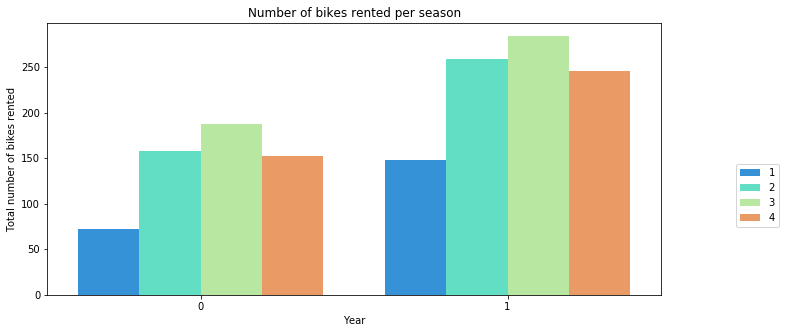

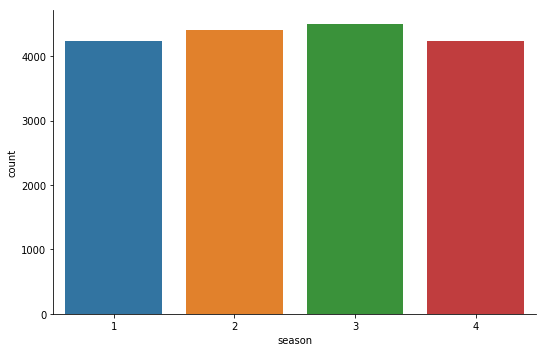

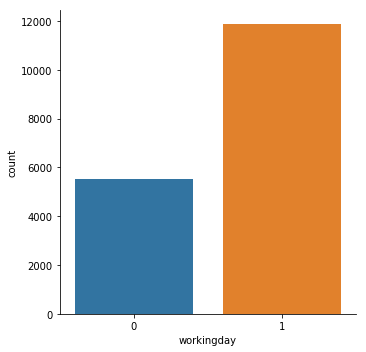

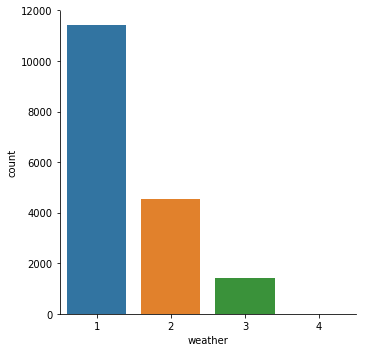

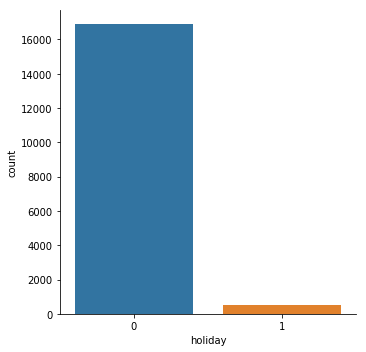

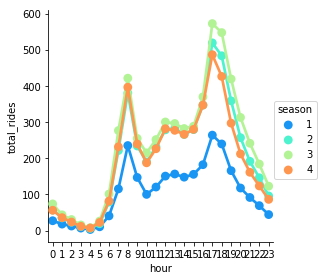

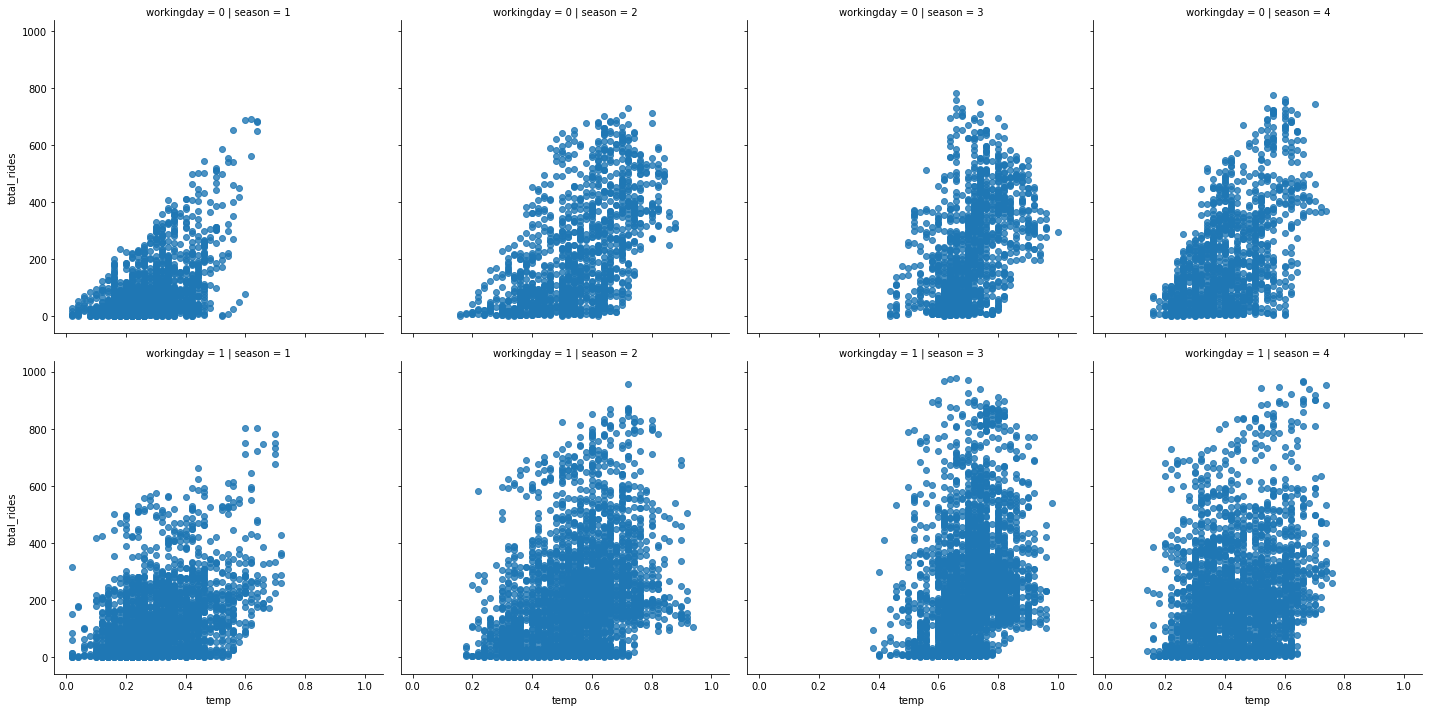

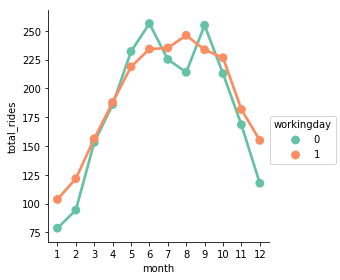

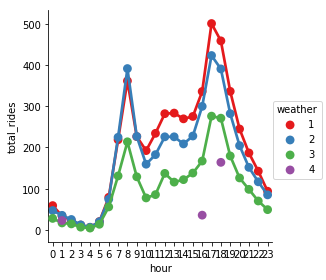

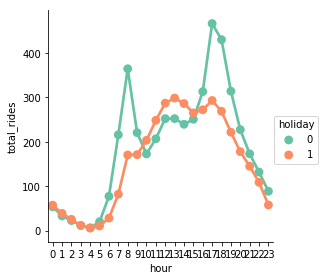

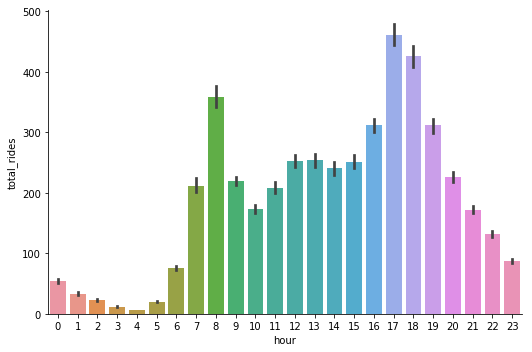

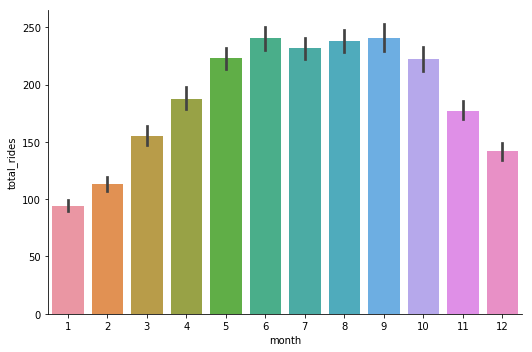

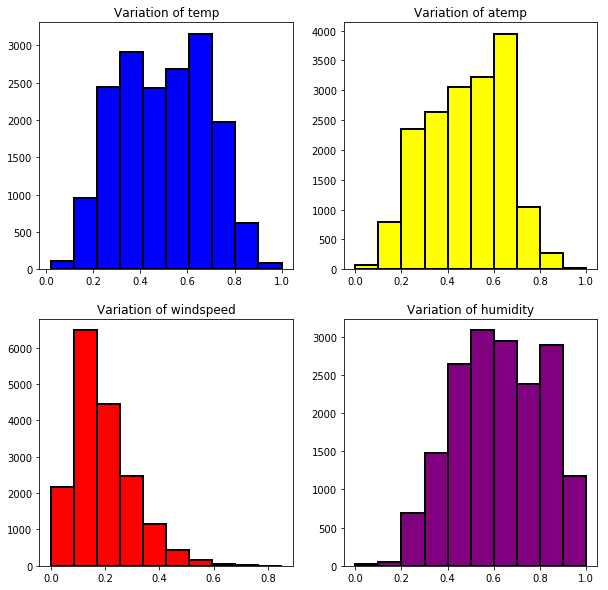

In [7]:
#Number of bikes rented per season
plt.figure(figsize=(11,5))
sns.barplot('year','total_rides',hue='season', data=data,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

print(data.season.value_counts()) #Season attribute
sns.factorplot(x='season',data=data,kind='count',size=5,aspect=1.5)

print(data.workingday.value_counts()) #workingday attribute
sns.factorplot(x='workingday',data=data,kind='count',size=5,aspect=1)

print(data.weather.value_counts()) #weather attribute
sns.factorplot(x='weather',data=data,kind='count',size=5,aspect=1)
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

print(data.holiday.value_counts())#Holiday attribute
sns.factorplot(x='holiday',data=data,kind='count',size=5,aspect=1)

##Hour,total_rides-season attribute
sns.factorplot('hour','total_rides',hue='season',data=data, ci=None, palette='rainbow')

##Temp,total_rides-workingday,season attributes
sns.lmplot('temp','total_rides',row='workingday',col='season',data=data,palette='RdBu_r',fit_reg=False)#workingday

##Month,total_rides-workingday
sns.factorplot('month','total_rides',hue='workingday',data=data, ci=None, palette='Set2')

##Hour,total_rides-weather attribute
sns.factorplot('hour','total_rides',hue='weather',data=data, ci=None, palette='Set1')#weather
# 1= Clear, Few clouds, Partly cloudy, Partly cloudy
# 2= Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3= Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4= Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

##Hour,total_rides-holiday attribute
sns.factorplot('hour','total_rides',hue='holiday',data=data, ci=None, palette='Set2')

#Hour attribute
sns.factorplot(x="hour",y="total_rides",data=data,kind='bar',size=5,aspect=1.5)

#month attribute
sns.factorplot(x="month",y="total_rides",data=data,kind='bar',size=5,aspect=1.5)

#temperature, windspeed, humidity attribute
data.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=data,edgecolor="black",
               linewidth=2,color='blue')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=data,edgecolor="black",
               linewidth=2,color='yellow')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=data,edgecolor="black",
               linewidth=2,color='red')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=data,edgecolor="black",
               linewidth=2,color='purple')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

## Part 4 Verify dataset quality (Correlation matrix)

In [8]:
corr_matrix = data.corr()
corr_matrix['total_rides'].sort_values(ascending=True)

humidity      -0.322911
weather       -0.142426
holiday       -0.030927
weekday        0.026900
workingday     0.030284
windspeed      0.093234
month          0.120638
season         0.178056
year           0.250495
instant        0.278379
hour           0.394071
atemp          0.400929
temp           0.404772
casual         0.694564
registered     0.972151
total_rides    1.000000
Name: total_rides, dtype: float64

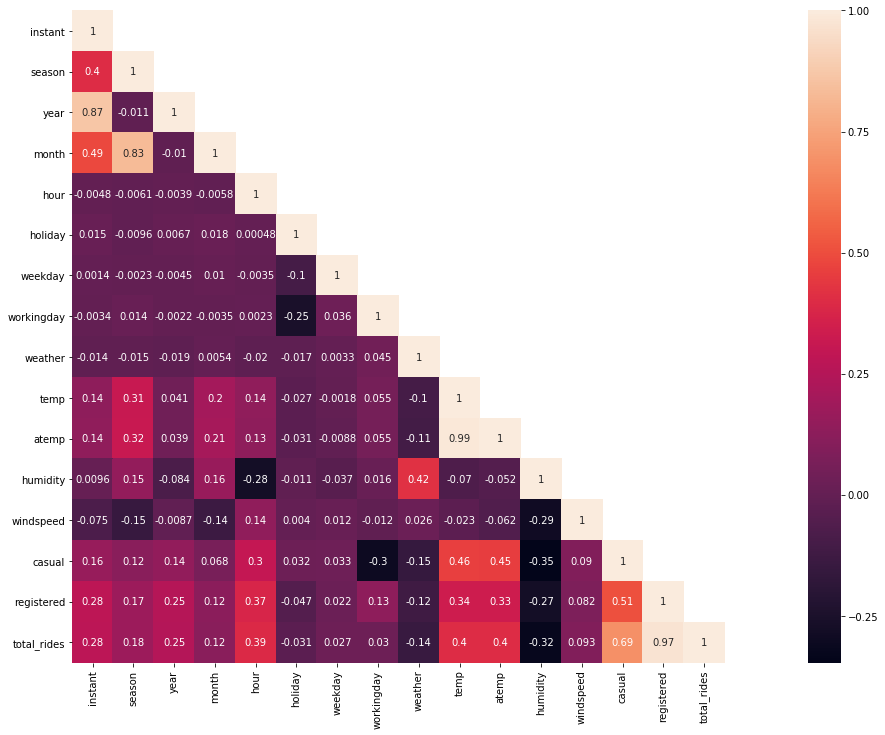

In [9]:
corr_mat= data[:].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr_mat,mask=mask,square=True,annot=True,cbar=True)

Text(0.5,1,'Relationship between hour and total rides')

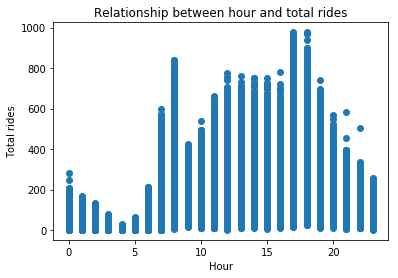

In [10]:
plt.scatter(data.hour, data.total_rides)
plt.xlabel('Hour')
plt.ylabel('Total rides')
plt.title('Relationship between hour and total rides')

# Stage 3 
# Part 1: Preprocessing Data

In [11]:
#Searching for missing values
data.isnull().values.any()

False

## Part 2 Drop irrelevent features

In [12]:
data.drop(['instant','datetime','casual','registered'],axis=1,
          inplace=True)
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,total_rides
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## Part 3 Spliting train and test datasets

In [13]:
features=['season','year','month','hour','holiday',
          'weekday','workingday','weather','temp','atemp','humidity',
          'windspeed']
X=data[features]
y=data["total_rides"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.60,
                                                    test_size = 0.40, 
                                                    random_state = 0)

## Part 4 Converting features and encoding labels

In [14]:
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in X_train.columns], dtype = bool)

categorical_data_columns = ['season', 'weather', 'month'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in X_train.columns], dtype = bool)

numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'hour']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in X_train.columns], dtype = bool)

In [15]:
transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ]

### Defining Root Mean Squared Logarithmic Error (RMSLE)
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE) so lets define it. Also we are using common mean absolute error

In [16]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# Stage 4
## Part 1 Feature Selection Technique

In [17]:
#Sequential Feature Selector
pred_model=GaussianNB()
sfs=SFS(pred_model, k_features=5, forward=True, scoring='accuracy', cv=0)
sfs=sfs.fit(data[features],data["total_rides"])

In [18]:
sfs.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.0163991]),
  'avg_score': 0.016399102364923184,
  'feature_names': ('hour',)},
 2: {'feature_idx': (3, 9),
  'cv_scores': array([0.02595086]),
  'avg_score': 0.025950860233615283,
  'feature_names': ('hour', 'atemp')},
 3: {'feature_idx': (3, 9, 11),
  'cv_scores': array([0.03061166]),
  'avg_score': 0.030611657747856607,
  'feature_names': ('hour', 'atemp', 'windspeed')},
 4: {'feature_idx': (3, 9, 10, 11),
  'cv_scores': array([0.03210772]),
  'avg_score': 0.03210771620921802,
  'feature_names': ('hour', 'atemp', 'humidity', 'windspeed')},
 5: {'feature_idx': (2, 3, 9, 10, 11),
  'cv_scores': array([0.03400656]),
  'avg_score': 0.03400655964094597,
  'feature_names': ('month', 'hour', 'atemp', 'humidity', 'windspeed')}}

## Part 2 Train models selection
## Parametric (Linear Regression)

In [19]:
regressor = linear_model.Lasso(max_iter = 2000)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', regressor)
    ]
)

estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)

print("RMSLE: ", rmsle(y_test, y_predicted))
print("MAE: ",  metrics.mean_absolute_error(y_test, y_predicted))

RMSLE:  1.2487059261555213
MAE:  106.12320561752935


In [20]:
#Check for linear regression model score
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.38630894803277416

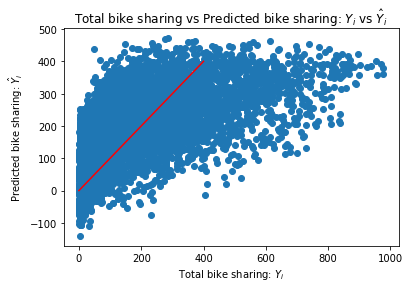

In [21]:
y_predicted = regression_model.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.xlabel('Total bike sharing: $Y_i$')
plt.ylabel('Predicted bike sharing: $\hat{Y}_i$')
plt.title('Total bike sharing vs Predicted bike sharing: $Y_i$ vs $\hat{Y}_i$')

x = np.linspace(0,400)
y = x

plt.plot(x,y, 'r')

In [22]:
parameters_grid = {
    'model_fitting__alpha' : [0.1, 1, 2, 3, 4, 10, 30]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_cv = grid_search.GridSearchCV(estimator, parameters_grid, scoring = rmsle_scorer, cv = 3)
grid_cv.fit(X_train, y_train)
y_predicted = grid_cv.best_estimator_.predict(X_test)
print("RMSLE: ", rmsle(y_test,y_predicted))
print("Best params: ", grid_cv.best_params_)

RMSLE:  1.2229405814892536
Best params:  {'model_fitting__alpha': 4}


## Non-parametric (KNeighborRegressor)

In [23]:
regressor = KNeighborsRegressor(n_neighbors=5,n_jobs=1)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', regressor)
    ]
)
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)

print("RMSLE: ", rmsle(y_test,y_predicted))
print("MAE: ",  metrics.mean_absolute_error(y_test,y_predicted))

RMSLE:  0.9002866631108838
MAE:  77.11668584579976


In [24]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
grid_cv=grid_search.GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
grid_cv.fit(X_train, y_train)
y_predicted = grid_cv.best_estimator_.predict(X_test)

print("RMSLE: ", rmsle(y_test,y_predicted))
print("Best params: ", grid_cv.best_params_)

RMSLE:  0.43126509277366726
Best params:  {'n_jobs': -1, 'n_neighbors': 5}


## Non-parametric (RandomForestRegressor)

In [25]:
regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 150)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', regressor)
    ]
)
estimator.fit(X_train,y_train)
y_predicted = estimator.predict(X_test)

print("RMSLE: ", rmsle(y_test,y_predicted))
print("MAE: ",  metrics.mean_absolute_error(y_test,y_predicted))

RMSLE:  0.44366233847861003
MAE:  46.45836289385699


In [26]:
parameters_grid = {'model_fitting__n_estimators' : [70, 100, 130],
'model_fitting__max_features' : [3, 4, 5, 6],}
grid_cv = grid_search.GridSearchCV(estimator, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 2)
grid_cv.fit(X_train, y_train)
y_predicted = grid_cv.best_estimator_.predict(X_test)

print("RMSLE: ", rmsle(y_test,y_predicted))
print("Best params: ", grid_cv.best_params_)

RMSLE:  0.5976748290765042
Best params:  {'model_fitting__max_features': 6, 'model_fitting__n_estimators': 130}


## Non-parametric (SVR)

In [27]:
regressor = SVR(kernel='rbf', C=0.1, gamma=0.1)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', regressor)
    ]
)
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)
print("RMSLE: ", rmsle(y_test,y_predicted))
print("MAE: ",  metrics.mean_absolute_error(y_test,y_predicted))

RMSLE:  1.285358791538263
MAE:  116.16991292670045


In [28]:
regressor = SVR(kernel='poly',C=0.1, gamma=0.1, degree=8)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', regressor)
    ]
)
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)
print("RMSLE: ", rmsle(y_test,y_predicted))
print("MAE: ",  metrics.mean_absolute_error(y_test,y_predicted))

RMSLE:  1.0379487925425857
MAE:  79.02287843285264


### Results

_Before_

**Parametric**

    * LinearRegression RMSLE 1.248 MAE 106

**Non-parametric**

    * KNeighborsRegressor RMSLE 0.900 MAE 77
    * RandomForest RMSLE 0.444 MAE 46
    * Support Vector Regressor RMSLE 1.285 MAE 116

_After-Comparison after parameter tuning_

**Parametric**

    * LinearRegression RMSLE 1.222

**Non-parametric**

    * KNeighborsRegressor RMSLE 0.431
    * RandomForest RMSLE 0.598
    * Support Vector Regressor RMSLE 1.038